In [1]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_input,train_target),(test_input,test_target) = mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

In [5]:
train_target.shape

(60000,)

In [6]:
# 문제: 다항
# 활성화: softmax
# loss: categorical_crossentropy

In [7]:
# input전처리
train_input = train_input.reshape((-1,28,28,1))

In [8]:
from tensorflow.keras.utils import to_categorical

train_target= to_categorical(train_target)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=((28,28,1))))
model.add(layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-10-25 21:24:26.304625: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-25 21:24:26.304682: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-25 21:24:26.304703: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-25 21:24:26.304960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-25 21:24:26.305382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                   

In [11]:
model.fit(train_input,train_target,epochs=5,batch_size=256)

Epoch 1/5
235/235 [==============================] - 7s 31ms/step - loss: 0.3742 - accuracy: 0.9698
Epoch 2/5
235/235 [==============================] - 8s 33ms/step - loss: 0.4441 - accuracy: 0.9778
Epoch 3/5
235/235 [==============================] - 9s 36ms/step - loss: 0.5964 - accuracy: 0.9822
Epoch 4/5
235/235 [==============================] - 8s 33ms/step - loss: 1.3783 - accuracy: 0.9837
Epoch 5/5
235/235 [==============================] - 8s 33ms/step - loss: 2.8647 - accuracy: 0.9845


ValueError: in user code:

    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [15]:
from tensorflow.keras.layers import Subtract,Add,Concatenate,Input,Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

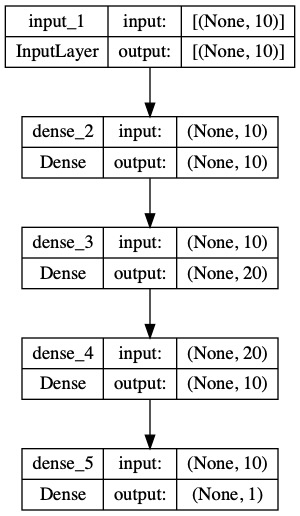

In [13]:
input_1 = Input(shape=(10,))
dense10 = Dense(10)(input_1)
dense20 = Dense(20)(dense10)
dense10_1 = Dense(10)(dense20)
dense1 = Dense(1)(dense10_1)

model1 = Model(inputs=[input_1],outputs=[dense1])
plot_model(model1,to_file='adfasdf.jpg',show_shapes=True)

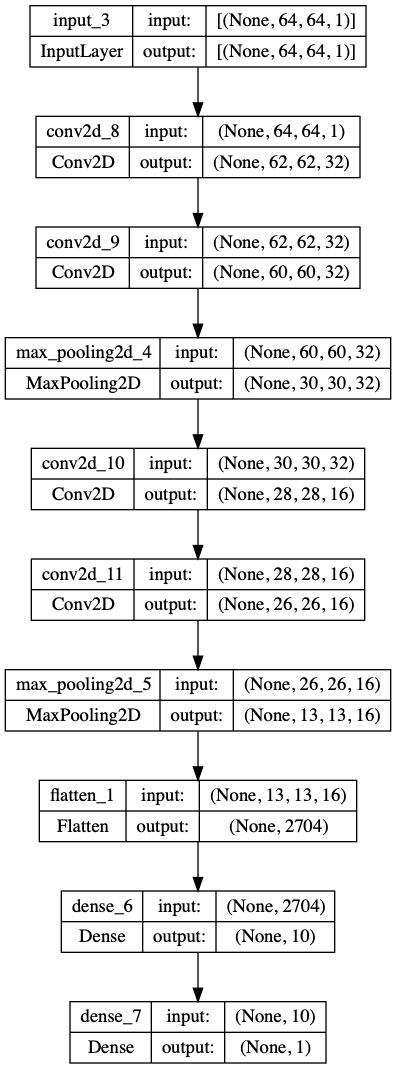

In [16]:
input_6 = Input(shape=(64,64,1))
conv1 = Conv2D(32,kernel_size=(3,3))(input_6)
conv2 = Conv2D(32,kernel_size=(3,3)) (conv1)
maxPool1 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(16,kernel_size=(3,3))(maxPool1)
conv4 = Conv2D(16,kernel_size=(3,3))(conv3)
maxPool2 = MaxPooling2D((2,2))(conv4)
flat = Flatten()(maxPool2)
dense1 = Dense(10)(flat)
dense2 = Dense(1)(dense1)

model2 = Model(inputs=[input_6],outputs=[dense2])
plot_model(model2,to_file='adfasdf.jpg',show_shapes=True)

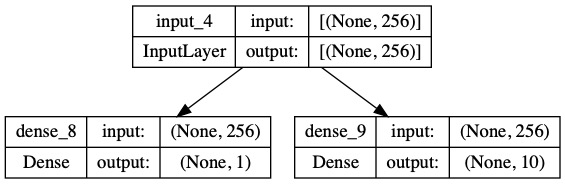

In [17]:
input1 = Input(shape=(256,))
output1 = Dense(1)(input1)
output2 = Dense(10)(input1)
model3 = Model(inputs=[input1],outputs=[output1,output2])
plot_model(model3,to_file='adfasdf.jpg',show_shapes=True)

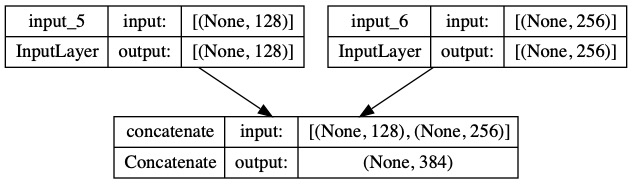

In [18]:
input1 = Input(shape=(128,))
input2 = Input(shape=(256,))
output = Concatenate()([input1,input2])
model4 = Model(inputs=[input1,input2],outputs=[output])
plot_model(model4,to_file='adfasdf.jpg',show_shapes=True)

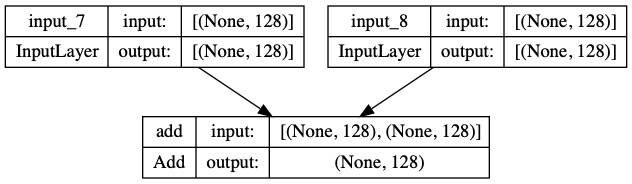

In [19]:
input1 = Input(shape=(128,))
input2 = Input(shape=(128,))
output= Add()([input1,input2])
model5 = Model(inputs=[input1,input2],outputs=[output])
plot_model(model5,to_file='adfasdf.jpg',show_shapes=True)

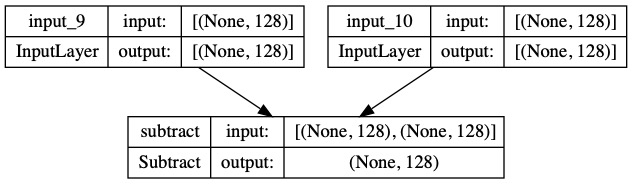

In [20]:
input1 = Input(shape=(128,))
input2 = Input(shape=(128,))
output = Subtract()([input1,input2])
model6 = Model(inputs=[input1,input2],outputs=[output])
plot_model(model6,to_file='adfasdf.jpg',show_shapes=True)

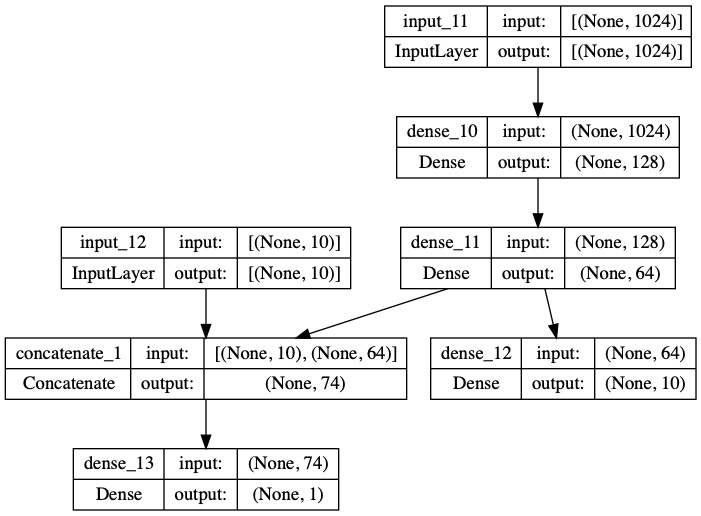

In [21]:
main_input = Input(shape=(1024,))
dense128 = Dense(128)(main_input)

aux_input = Input(shape=(10,))
dense64 = Dense(64)(dense128)

merge = Concatenate()([aux_input,dense64])

aux_output = Dense(10)(dense64)
main_output = Dense(1)(merge)

model7 = Model(inputs=[aux_input,main_input],outputs=[aux_output,main_output])

plot_model(model7,to_file='adfasdf.jpg',show_shapes=True)

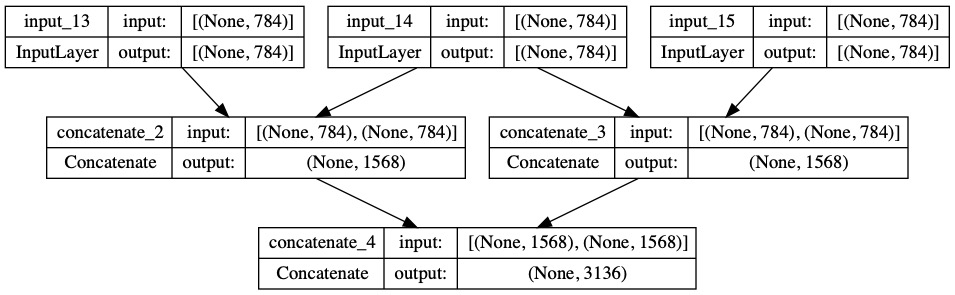

In [22]:
input_7 = Input(shape=(784))
input_8 = Input(shape=(784))
input_9 = Input(shape=(784))

conca1 = Concatenate()([input_7,input_8])
conca2 = Concatenate()([input_8,input_9])
conca3 = Concatenate()([conca1,conca2])

model8 = Model(inputs=[input_7,input_8,input_9],outputs=[conca3])

plot_model(model8,to_file='adfasdf.jpg',show_shapes=True)

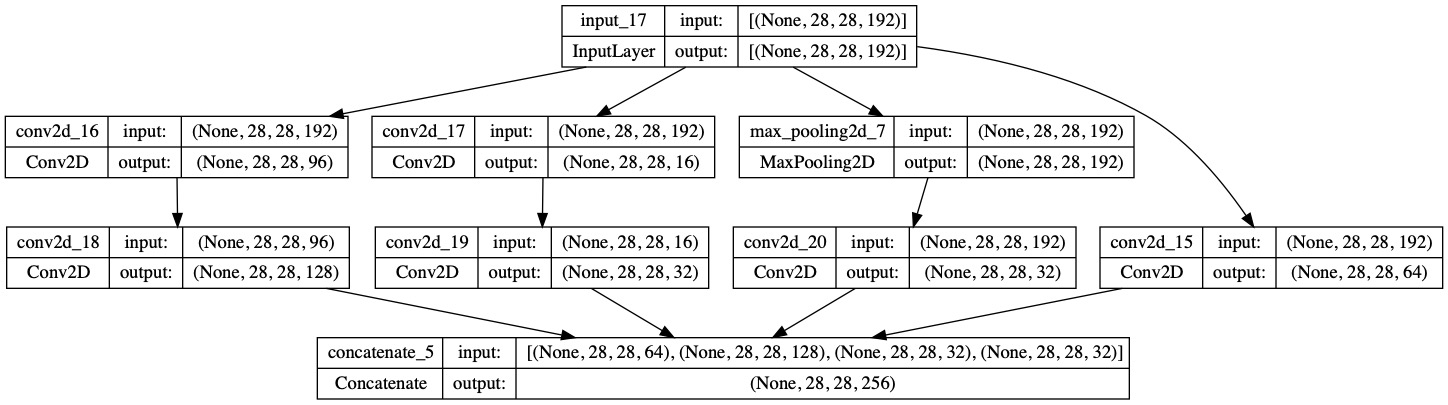

In [24]:
input_24 = Input(shape=(28,28,192))

conv2d_0 = Conv2D(64,kernel_size=(1,1),padding='same') (input_24)
conv2d_1 = Conv2D(96,kernel_size=(1,1),padding='same') (input_24)
conv2d_2 = Conv2D(16,kernel_size=(1,1),padding='same') (input_24)
max_pooling2d = MaxPooling2D((3,3),strides=1,padding='same') (input_24)

conv2d_3 = Conv2D(128,kernel_size=(3,3),padding='same') (conv2d_1)
conv2d_4 = Conv2D(32,kernel_size=(5,5),padding='same') (conv2d_2)
conv2d_5 = Conv2D(32,kernel_size=(1,1),padding='same') (max_pooling2d)

concat = Concatenate()([conv2d_0,conv2d_3,conv2d_4,conv2d_5])
model9 = Model(inputs=[input_24], outputs=[concat])

plot_model(model9,to_file='adfasdf.jpg',show_shapes=True)

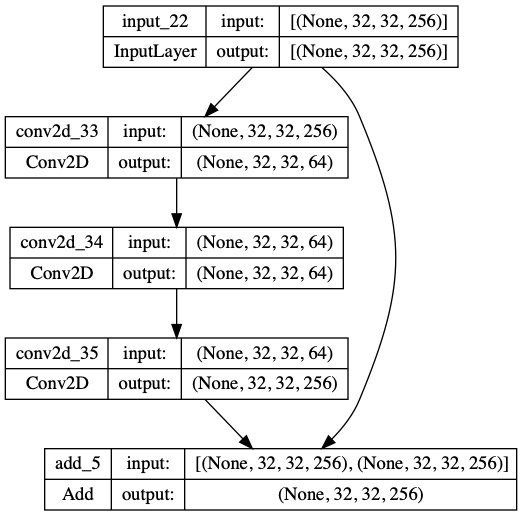

In [29]:
input100 = Input(shape=(32,32,256))

conv1 = Conv2D(64,kernel_size=(1,1),padding='same')(input100)
conv2 = Conv2D(64,kernel_size=(3,3),padding='same')(conv1)
conv3 = Conv2D(256,kernel_size=(1,1),padding='same')(conv2)

add = Add()([input100,conv3])
model10 = Model(inputs=[input100], outputs=[add])
plot_model(model10,to_file='adfasdf.jpg',show_shapes=True)

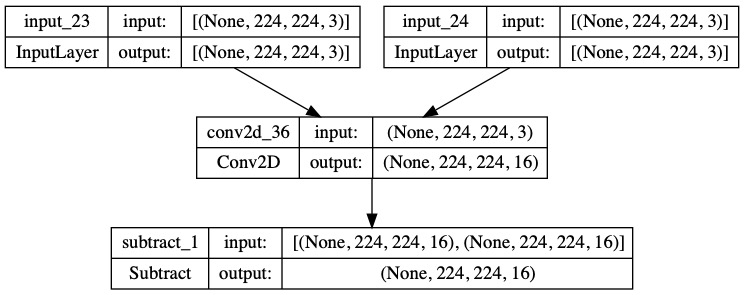

In [30]:
input_1 = Input(shape=(224,224,3))
input_2 = Input(shape=(224,224,3))

conv = Conv2D(16,kernel_size=(1,1))
conv1 = conv(input_1)
conv2 = conv(input_2)

output = Subtract()([conv1,conv2])

model11 = Model(inputs=[input_1,input_2], outputs=[output])
plot_model(model11,to_file='adfasdf.jpg',show_shapes=True)

In [32]:
from sklearn import datasets

bcancer = datasets.load_breast_cancer()
input1 = bcancer.data 
target = bcancer.target

In [33]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(input1,target,random_state=42) 

In [34]:
train_input.shape

(426, 30)

In [35]:
# 문제: 이진분류

In [36]:
# 전처리

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_input)
train_inpit = sc.transform(train_input)

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model12 = keras.Sequential()
model12.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model12.add(layers.Dense(1, activation='sigmoid'))
model12.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model12.fit(train_input,train_target,epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 166.2398 - accuracy: 0.6291
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 89.3919 - accuracy: 0.6315
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 38.8784 - accuracy: 0.3638
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 29.5473 - accuracy: 0.1268
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 25.9949 - accuracy: 0.1385
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 22.6700 - accuracy: 0.1596
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 19.1260 - accuracy: 0.1831
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 15.0644 - accuracy: 0.2066
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 11.9924 - accuracy: 0.2700
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 9.9170 - accuracy: 0.349

14/14 [==============================] - 0s 7ms/step - loss: 0.4255 - accuracy: 0.9014
Epoch 83/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7233 - accuracy: 0.8451
Epoch 84/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4994 - accuracy: 0.8779
Epoch 85/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4338 - accuracy: 0.8756
Epoch 86/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3981 - accuracy: 0.9155
Epoch 87/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7374 - accuracy: 0.8568
Epoch 88/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5131 - accuracy: 0.8826
Epoch 89/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3495 - accuracy: 0.8920
Epoch 90/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.8545
Epoch 91/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3964 - accuracy: 0.8850
Epoch 92/100


In [41]:
sc = StandardScaler()
sc.fit(test_input)
test_input = sc.transform(test_input)
model12.evaluate(test_input,test_target)

5/5 [==============================] - 0s 52ms/step - loss: 0.3909 - accuracy: 0.8811


[0.39087817072868347, 0.881118893623352]

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

train_input,test_input,train_target,test_target = train_test_split(data,target,random_state=42)

train_input.shape

(331, 10)

In [48]:
train_target.shape

(331,)

In [46]:
# 회귀

In [47]:
# 전처리

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_input)
train_input = sc.transform(train_input)

In [49]:
sc1 = StandardScaler()
train_target = train_target.reshape((-1,1))
sc.fit(train_target)
train_target = sc.transform(train_target)

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
model13 = keras.Sequential()
model13.add(layers.Dense(6, activation='relu', input_shape=(10,)))
model13.add(layers.Dense(1, activation='linear'))

model13.compile(optimizer='rmsprop', loss='mse', metrics='mae')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 6)                 66        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model13.fit(train_input,train_target,epochs=5)

Epoch 1/5
11/11 [==============================] - 1s 14ms/step - loss: 2.4740 - mae: 1.2859
Epoch 2/5
11/11 [==============================] - 0s 6ms/step - loss: 2.0539 - mae: 1.1660
Epoch 3/5
11/11 [==============================] - 0s 6ms/step - loss: 1.8151 - mae: 1.0944
Epoch 4/5
11/11 [==============================] - 0s 6ms/step - loss: 1.6318 - mae: 1.0359
Epoch 5/5
11/11 [==============================] - 0s 6ms/step - loss: 1.4907 - mae: 0.9909


In [56]:
sc2 = StandardScaler()
sc2.fit(test_input)
test_input = sc2.transform(test_input)

sc3 = StandardScaler()
test_target = test_target.reshape((-1,1))
sc3.fit(test_target)
test_target = sc3.transform(test_target)

model13.evaluate(test_input,test_target)

4/4 [==============================] - 0s 11ms/step - loss: 2.5242 - mae: 1.2902


[2.5242414474487305, 1.2901811599731445]